<a href="https://colab.research.google.com/github/Kazuyasus/Econometrics/blob/main/13th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib numpy statsmodels rdd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.api import OLS, add_constant
from rdd import rdd
from rdd import RD



In [ ]:
# GitHubのCSVデータを読み込む
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/MPs.csv"
MPs = pd.read_csv(url)

MPs.head()

,surname,firstname,party,ln.gross,ln.net,yob,yod,margin.pre,region,margin
0,Llewellyn,David,tory,12.135906,12.135906,1916.0,1992,NaN,Wales,0.056904
1,Morris,Claud,labour,12.448091,12.448091,1920.0,2000,NaN,South West England,-0.049738
2,Walker,George,tory,12.428450,10.349009,1914.0,1999,-0.057168,North East England,-0.041589
3,Walker,Harold,labour,11.918452,12.395034,1927.0,2003,-0.072509,Yorkshire and Humberside,0.023295
4,Waring,John,tory,13.520219,13.520219,1923.0,1989,-0.269690,Greater London,-0.230006


In [ ]:
# 労働党と保守党のデータを分割
MPs_labour = MPs[MPs['party'] == "labour"]
MPs_tory = MPs[MPs['party'] == "tory"]

In [ ]:
# 回帰分析（労働党）落選者 ['margin'] < 0
labour_fit1 = sm.OLS(MPs_labour.loc[MPs_labour['margin'] < 0, 'ln.net'],
                      sm.add_constant(MPs_labour.loc[MPs_labour['margin'] < 0, 'margin'])).fit()

In [ ]:
# 回帰分析（労働党）当選者 labour['margin'] > 0
labour_fit2 = sm.OLS(MPs_labour.loc[MPs_labour['margin'] > 0, 'ln.net'],
                      sm.add_constant(MPs_labour.loc[MPs_labour['margin'] > 0, 'margin'])).fit()

In [ ]:
# 回帰分析（保守党）落選者 ['margin'] < 0
tory_fit1 = sm.OLS(MPs_tory.loc[MPs_tory['margin'] < 0, 'ln.net'],
                    sm.add_constant(MPs_tory.loc[MPs_tory['margin'] < 0, 'margin'])).fit()

In [ ]:
# 回帰分析（保守党）当選者 ['margin'] > 0
tory_fit2 = sm.OLS(MPs_tory.loc[MPs_tory['margin'] > 0, 'ln.net'],
                    sm.add_constant(MPs_tory.loc[MPs_tory['margin'] > 0, 'margin'])).fit()

In [ ]:
# marginの範囲設定 労働党
##[1]予測範囲の最小値   当選者の場合は0、落選者の場合はmin
##[2]予測範囲の最大値   当選者の場合はmax、落選者の場合は0
labour_range1 = np.array([MPs_labour['margin'].min(), 0])
labour_range2 = np.array([0, MPs_labour['margin'].max()])
y1_labour = labour_fit1.predict(sm.add_constant(labour_range1))
y2_labour = labour_fit2.predict(sm.add_constant(labour_range2))

In [ ]:
# marginの範囲設定 保守党
##[1]予測範囲の最小値   当選者の場合は0、落選者の場合はmin
##[2]予測範囲の最大値   当選者の場合はmax、落選者の場合は0
tory_range1 = np.array([MPs_tory['margin'].min(), 0])
tory_range2 = np.array([0, MPs_tory['margin'].max()])
y1_tory = tory_fit1.predict(sm.add_constant(tory_range1))
y2_tory = tory_fit2.predict(sm.add_constant(tory_range2))

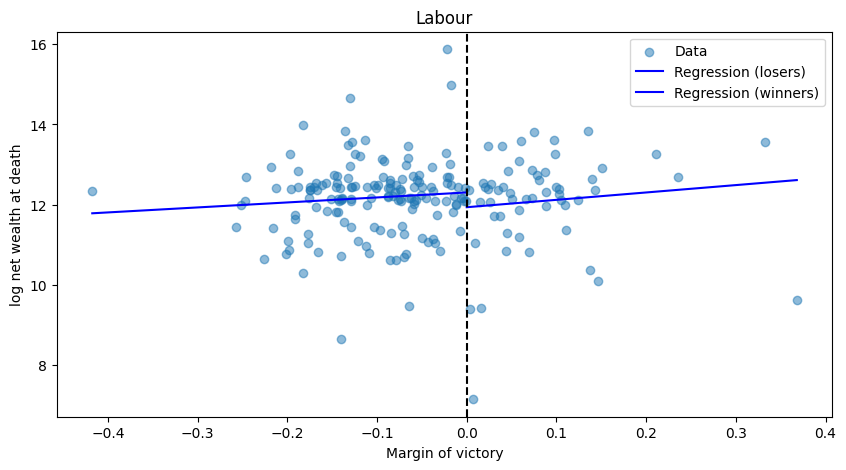

In [ ]:
# グラフの描画（労働党）
plt.figure(figsize=(10,5))
plt.scatter(MPs_labour['margin'], MPs_labour['ln.net'], label="Data", alpha=0.5)
plt.plot(labour_range1, y1_labour, color='blue', label="Regression (losers)")
plt.plot(labour_range2, y2_labour, color='blue', label="Regression (winners)")
plt.axvline(0, linestyle='dashed', color='black')
plt.xlabel("Margin of victory")
plt.ylabel("log net wealth at death")
plt.title("Labour")
plt.legend()
plt.show()


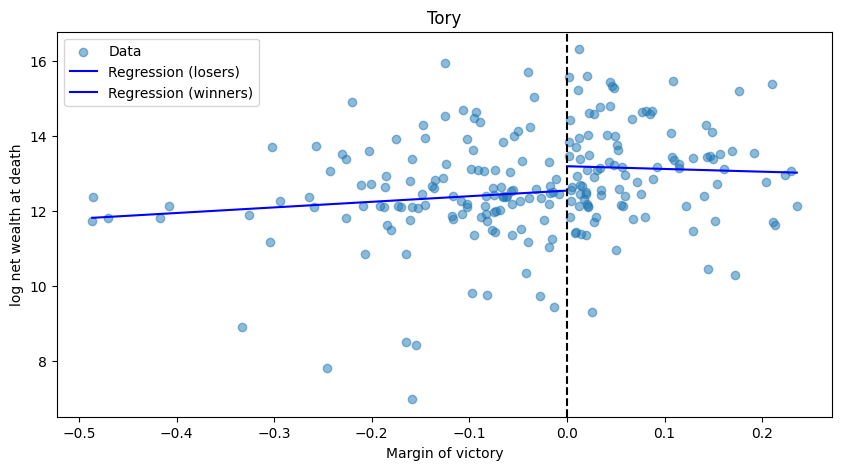

In [ ]:
# グラフの描画（保守党）
plt.figure(figsize=(10,5))
plt.scatter(MPs_tory['margin'], MPs_tory['ln.net'], label="Data", alpha=0.5)
plt.plot(tory_range1, y1_tory, color='blue', label="Regression (losers)")
plt.plot(tory_range2, y2_tory, color='blue', label="Regression (winners)")
plt.axvline(0, linestyle='dashed', color='black')
plt.xlabel("Margin of victory")
plt.ylabel("log net wealth at death")
plt.title("Tory")
plt.legend()
plt.show()

In [ ]:
# 予測値を用いた計算
# 保守党所属していた元議員(当選者)の純資産(平均値)
tory_MP = np.exp(y2_tory[0])
# 保守党所属していた元非議員(落選者)の純資産(平均値)
tory_nonMP = np.exp(y1_tory[1])

# 当選者と落選者の純資産の差
causal_effect = tory_MP - tory_nonMP
print("Causal Effect (Pounds):", causal_effect)

Causal Effect (Pounds): 255050.92314682307


In [ ]:
###################################################################################################3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm

In [ ]:
# サンプルサイズの指定
N = 200
np.random.seed(1)

# 能力の乱数生成
abil = np.random.normal(0, 10, N)

# 強制変数の生成
Z = np.minimum(np.random.normal(60, 8, N) + abil, 100)

# 処置変数の定義
T = (Z < 60).astype(int)

# 反応変数の生成
Y = np.minimum(np.random.normal(55, 6, N) + np.sqrt(Z) + T * 10 + abil, 100)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39443 (\N{CJK UNIFIED IDEOGRAPH-9A13}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas

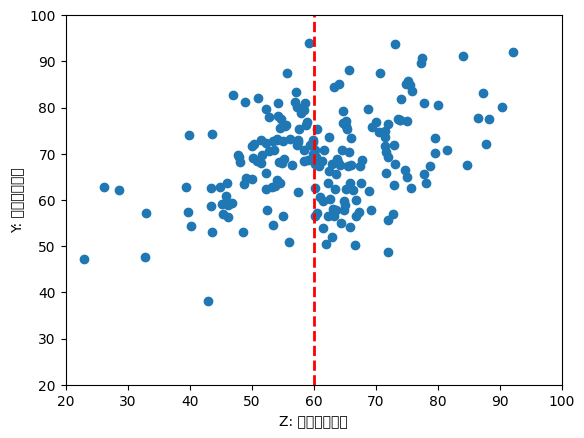

In [ ]:
# 散布図の描画
plt.scatter(Z, Y)
plt.axvline(x=60, color='red', linewidth=2, linestyle='dashed')
plt.xlabel('Z: 前期試験点数')
plt.ylabel('Y: 後期試験点数')
plt.xlim(20, 100)
plt.ylim(20, 100)
plt.show()


In [ ]:
#################################################################################################################
# GitHubのCSVデータを読み込む
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/extraclass.csv"
df = pd.read_csv(url)

df.head()

,Unnamed: 0,Y,Z
0,1,72.732649,57.010677
1,2,76.890651,75.347420
2,3,51.046729,64.336421
3,4,77.169467,73.305546
4,5,72.506933,45.013193


In [ ]:
# 変数の再定義
Y = df['Y']
Z = df['Z']
T = (Z < 60).astype(int)

In [ ]:
# 線形回帰モデルの構築
X = np.column_stack([T, T * (Z - 60), (1 - T) * (Z - 60)])
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     27.13
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.01e-14
Time:                        02:10:36   Log-Likelihood:                -724.10
No. Observations:                 200   AIC:                             1456.
Df Residuals:                     196   BIC:                             1469.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0665      1.456     41.266      0.0

In [ ]:
# 条件付き期待値が非線形の場合
h = 5
o = (60 - h <= Z) & (Z <= 60 + h)
X = sm.add_constant(T[o])
model_nonlinear = sm.OLS(Y[o], X).fit()
print(model_nonlinear.summary())

#h <- 5
#o <- which(60 - h <= Z & Z <= 60 + h)
#summary(lm(Y[o]~T[o]))


#Rの結果と不一致

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     25.40
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           3.34e-06
Time:                        02:19:53   Log-Likelihood:                -266.37
No. Observations:                  74   AIC:                             536.7
Df Residuals:                      72   BIC:                             541.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0736      1.612     38.514      0.0

In [ ]:
# 局所線形回帰
X_local = np.column_stack([T, T * (Z - 60), (1 - T) * (Z - 60)])
X_local = sm.add_constant(X_local)
model_local = sm.OLS(Y[o], X_local[o]).fit()
print(model_local.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     8.443
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           7.29e-05
Time:                        02:20:03   Log-Likelihood:                -266.12
No. Observations:                  74   AIC:                             540.2
Df Residuals:                      70   BIC:                             549.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.6814      3.592     17.728      0.0

In [ ]:
################################################################################################3
# GitHubのCSVデータを読み込む
url = "https://raw.githubusercontent.com/Kazuyasus/Econometrics/main/scholarship.csv"
df = pd.read_csv(url)

df.head()

,GPA,inc
0,1.700989,615
1,2.283618,731
2,1.450382,510
3,3.275944,934
4,2.198387,336


In [ ]:
# 奨学金に関するデータの処理
Y = df['GPA']
Z = -df['inc'] / 100  # 家計収入の符号を逆転
c = -4

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


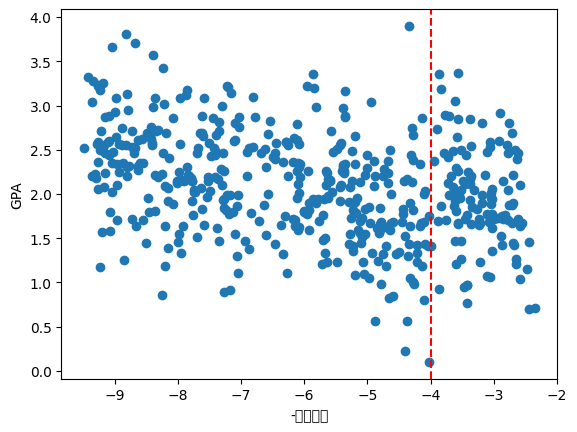

In [ ]:
# 散布図の描画
plt.scatter(Z, Y)
plt.axvline(x=c, color='red', linestyle='dashed')
plt.xlabel('-家計収入')
plt.ylabel('GPA')
plt.show()


In [ ]:
# McCraryテスト：強制変数の分布の連続性を確認（Python未実装)
# #帰無仮説「強制変数の滅度関数はZ=cにおいて連続(強制変数は操作可能ではない)」

In [ ]:
#局所線形回帰による推定　（Python未実装)
# Rのように、band幅を調整した結果を推計できない

# 以下では、上記でおこなった、局所回帰線形回帰の結果を表示

# データの準備（Z: forcing variable, Y: outcome）
# 例: Z = -df["income"]/100, Y = df["GPA"], c = -4
df_rdd = pd.DataFrame({"Z": Z, "Y": Y})
c = -4  # cutoff（奨学金対象の境界）

# バンド幅（±h）でデータを制限
h = 5
df_local = df_rdd[(df_rdd["Z"] >= c - h) & (df_rdd["Z"] <= c + h)].copy()

# 処置ダミー（Z < c）を作成
df_local["T"] = (df_local["Z"] < c).astype(int)

# RDDモデルの推定（局所線形）
df_local["Z_centered"] = df_local["Z"] - c
X = sm.add_constant(df_local[["T", "Z_centered"]])
model = sm.OLS(df_local["Y"], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     35.83
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           3.41e-15
Time:                        11:49:23   Log-Likelihood:                -386.79
No. Observations:                 466   AIC:                             779.6
Df Residuals:                     463   BIC:                             792.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0769      0.054     38.739      0.0